In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Importing CSV File
df=pd.read_csv('S:/ML/datasets/classification/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Checking Dataset information

In [3]:
df.shape

(4177, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### Checking Missing values if any

In [7]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

No missing values present in dataset.

#### Checking Outliers by boxplot

<AxesSubplot:>

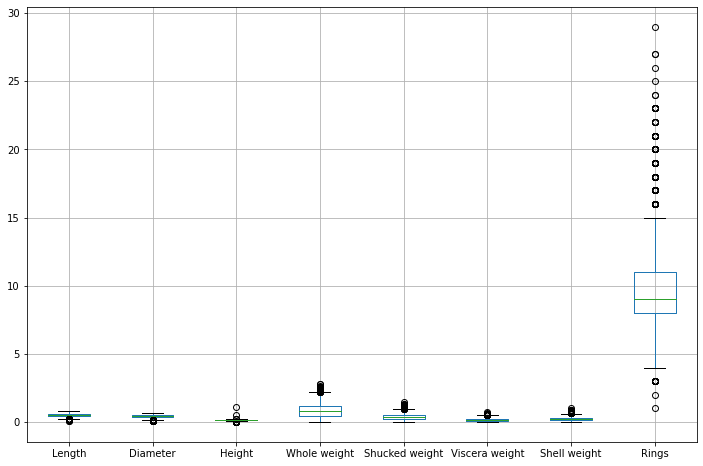

In [8]:
plt.figure(figsize=(12,8))
df.boxplot()

Many Outliers are present in the dataset.

#### Mapping

In [9]:
## Mapping targeted column
df['Sex']=df["Sex"].map({'M':3,'I':2,'F':1})
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,3,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,3,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,3,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,3,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


#### Checking Balancing

In [10]:
## Checking targeted column
df['Sex'].unique()

array([3, 1, 2], dtype=int64)

In [11]:
df['Sex'].value_counts()

3    1528
2    1342
1    1307
Name: Sex, dtype: int64

Data is balanced.no need of sampling data.

## Implementing Voting Classifier

In [12]:
# x as independent variable and y as dependent variable
x=df.drop(columns='Sex')
y=df['Sex']

In [13]:
## spliting data into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
# importing models
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [15]:
# defining models
models=[
    ('rfc',RandomForestClassifier(n_estimators=50)),
    ('abc',AdaBoostClassifier(n_estimators=50)),
    ('GBC',GradientBoostingClassifier(n_estimators=50)),
    ('XGB',XGBClassifier(n_estimators=50))
]

In [16]:
## training model for hard voting
from sklearn.ensemble import VotingClassifier
model=VotingClassifier(estimators=models,voting="hard")
model.fit(xtrain,ytrain)

F:\Installed\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('rfc', RandomForestClassifier(n_estimators=50)),
                             ('abc', AdaBoostClassifier()),
                             ('GBC',
                              GradientBoostingClassifier(n_estimators=50)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                          

In [17]:
#testing model(hard voting)
ypred=model.predict(xtest)

Accuracy: 0.5873205741626795
              precision    recall  f1-score   support

           1       0.51      0.44      0.47       262
           2       0.72      0.83      0.77       267
           3       0.51      0.50      0.51       307

    accuracy                           0.59       836
   macro avg       0.58      0.59      0.58       836
weighted avg       0.58      0.59      0.58       836



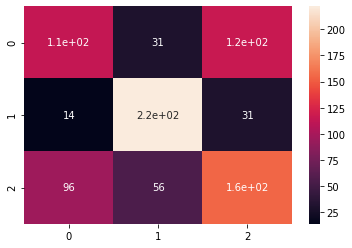

In [18]:
# evaluation of model(hard voting)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

In [19]:
## Training model for soft voting
model=VotingClassifier(estimators=models,voting='soft')
model.fit(xtrain,ytrain)

F:\Installed\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('rfc', RandomForestClassifier(n_estimators=50)),
                             ('abc', AdaBoostClassifier()),
                             ('GBC',
                              GradientBoostingClassifier(n_estimators=50)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                          

In [20]:
# Testing model(soft voting)
ypred=model.predict(xtest)

Accuracy: 0.5705741626794258
              precision    recall  f1-score   support

           1       0.47      0.39      0.42       262
           2       0.74      0.80      0.77       267
           3       0.49      0.53      0.51       307

    accuracy                           0.57       836
   macro avg       0.57      0.57      0.57       836
weighted avg       0.56      0.57      0.57       836



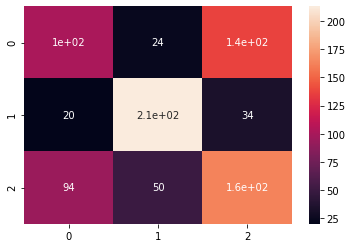

In [21]:
## Evaluation of model(soft voting)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print('Accuracy:',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

In [22]:
help(model)

Help on VotingClassifier in module sklearn.ensemble._voting object:

class VotingClassifier(sklearn.base.ClassifierMixin, _BaseVoting)
 |  VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)
 |  
 |  Soft Voting/Majority Rule classifier for unfitted estimators.
 |  
 |  Read more in the :ref:`User Guide <voting_classifier>`.
 |  
 |  .. versionadded:: 0.17
 |  
 |  Parameters
 |  ----------
 |  estimators : list of (str, estimator) tuples
 |      Invoking the ``fit`` method on the ``VotingClassifier`` will fit clones
 |      of those original estimators that will be stored in the class attribute
 |      ``self.estimators_``. An estimator can be set to ``'drop'``
 |      using ``set_params``.
 |  
 |      .. versionchanged:: 0.21
 |          ``'drop'`` is accepted. Using None was deprecated in 0.22 and
 |          support was removed in 0.24.
 |  
 |  voting : {'hard', 'soft'}, default='hard'
 |      If 'hard', uses predicted 

### Standard scaler data

In [23]:
x=df.drop(columns='Sex')
y=df['Sex']

In [24]:
## Spliting data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
## using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_xtrain=sc.fit_transform(xtrain)
sc_xtest=sc.fit_transform(xtest)

In [26]:
## training model(hard voting)
from sklearn.ensemble import VotingClassifier
model=VotingClassifier(estimators=models,voting='hard')
model.fit(sc_xtrain,ytrain)

F:\Installed\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('rfc', RandomForestClassifier(n_estimators=50)),
                             ('abc', AdaBoostClassifier()),
                             ('GBC',
                              GradientBoostingClassifier(n_estimators=50)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                          

In [27]:
## testing model(hard voting)
ypred=model.predict(sc_xtest)

Accuracy: 0.5633971291866029
              precision    recall  f1-score   support

           1       0.48      0.40      0.43       262
           2       0.71      0.82      0.76       267
           3       0.48      0.48      0.48       307

    accuracy                           0.56       836
   macro avg       0.55      0.57      0.56       836
weighted avg       0.55      0.56      0.55       836



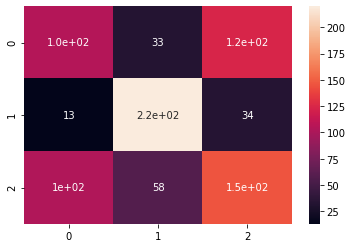

In [28]:
## Evaluation of model (hard voting)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

In [29]:
## traing model(soft voting)
model=VotingClassifier(estimators=models,voting='soft')
model.fit(sc_xtrain,ytrain)

F:\Installed\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('rfc', RandomForestClassifier(n_estimators=50)),
                             ('abc', AdaBoostClassifier()),
                             ('GBC',
                              GradientBoostingClassifier(n_estimators=50)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                          

In [30]:
#testing model(soft voting)
ypred=model.predict(sc_xtest)

Accuracy: 0.5526315789473685
              precision    recall  f1-score   support

           1       0.45      0.34      0.39       262
           2       0.72      0.82      0.77       267
           3       0.46      0.50      0.48       307

    accuracy                           0.55       836
   macro avg       0.54      0.55      0.54       836
weighted avg       0.54      0.55      0.54       836



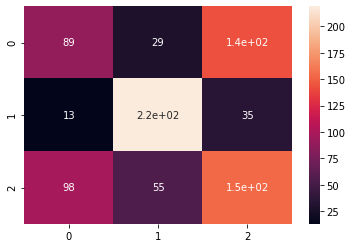

In [31]:
## Evaluation of model(soft voting)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

## Voting Classifier on Outliers Clipped data

<AxesSubplot:>

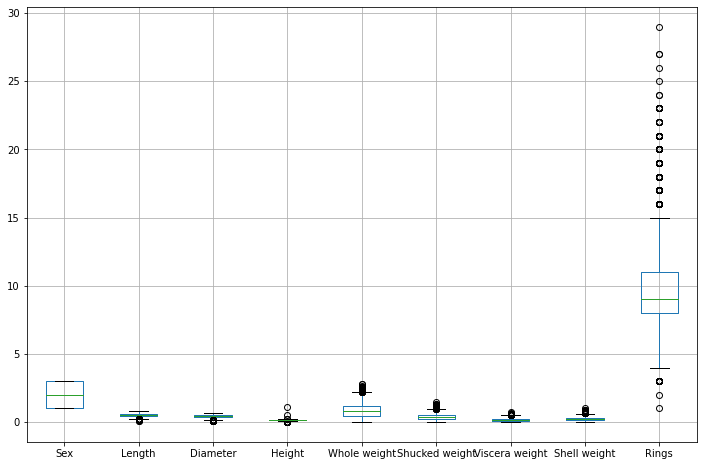

In [32]:
plt.figure(figsize=(12,8))
df.boxplot()

In [33]:
## Cliping Outliers
def clipvalues(df,lower,upper):
    for col in df.columns:
        l=df[col].quantile(lower)
        u=df[col].quantile(upper)
        df[col]=df[col].clip(l,u)
    return df    

<AxesSubplot:>

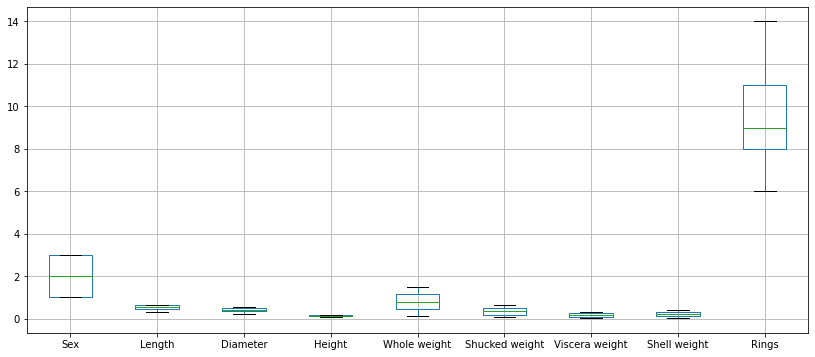

In [34]:
df1=df
df1=clipvalues(df1,0.05,0.90)
df1.boxplot(figsize=(14,6))

In [35]:
x1=df1.drop(columns='Sex')
y2=df1['Sex']

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y2,test_size=0.2,random_state=42)

In [37]:
## import necessary Models
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

#Defining Base Models
base_models=[
    ("RFC",RandomForestClassifier(n_estimators=50)),
    ("ABC",AdaBoostClassifier(n_estimators=50)),
    ("GBC",GradientBoostingClassifier(n_estimators=50)),
    ('XGB',XGBClassifier(n_estimators=50))
]

In [38]:
## training Model(hard voting)
from sklearn.ensemble import VotingClassifier
model=VotingClassifier(estimators=base_models,voting='hard')
model.fit(xtrain,ytrain)

F:\Installed\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('RFC', RandomForestClassifier(n_estimators=50)),
                             ('ABC', AdaBoostClassifier()),
                             ('GBC',
                              GradientBoostingClassifier(n_estimators=50)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                          

In [39]:
# Testing model(hard voting)
ypred=model.predict(xtest)

Accuracy: 0.5753588516746412
              precision    recall  f1-score   support

           1       0.47      0.37      0.42       262
           2       0.72      0.82      0.77       267
           3       0.51      0.53      0.52       307

    accuracy                           0.58       836
   macro avg       0.57      0.58      0.57       836
weighted avg       0.56      0.58      0.57       836



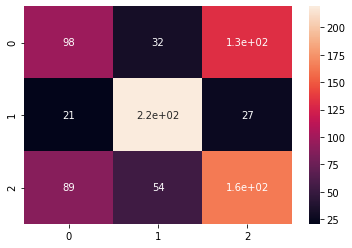

In [40]:
# Evaluation of model(hard voting)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print('Accuracy:',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

In [41]:
## Model Training(soft voting)
model=VotingClassifier(estimators=base_models,voting='soft')
model.fit(xtrain,ytrain)

F:\Installed\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('RFC', RandomForestClassifier(n_estimators=50)),
                             ('ABC', AdaBoostClassifier()),
                             ('GBC',
                              GradientBoostingClassifier(n_estimators=50)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                          

In [42]:
## Modeltesting(soft voting)
ypred=model.predict(xtest)

Accuracy: 0.5849282296650717
              precision    recall  f1-score   support

           1       0.50      0.40      0.45       262
           2       0.74      0.79      0.77       267
           3       0.50      0.57      0.53       307

    accuracy                           0.58       836
   macro avg       0.58      0.58      0.58       836
weighted avg       0.58      0.58      0.58       836



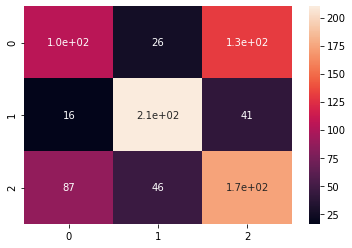

In [43]:
# Evaluation of model(soft voting)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print('Accuracy:',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

### Scaled Data

In [44]:
x1=df1.drop(columns='Sex')
y2=df1['Sex']

In [45]:
## Spliting data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y2,test_size=0.2,random_state=42)

In [46]:
## using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_xtrain=sc.fit_transform(xtrain)
sc_xtest=sc.fit_transform(xtest)

In [47]:
## Model Training(hard Voting)
model=VotingClassifier(estimators=base_models,voting='hard')
model.fit(sc_xtrain,ytrain)

F:\Installed\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('RFC', RandomForestClassifier(n_estimators=50)),
                             ('ABC', AdaBoostClassifier()),
                             ('GBC',
                              GradientBoostingClassifier(n_estimators=50)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                          

In [48]:
## Model Testing(hard voting)
ypred=model.predict(sc_xtest)

Accuracy: 0.5633971291866029
              precision    recall  f1-score   support

           1       0.46      0.38      0.42       262
           2       0.70      0.85      0.77       267
           3       0.49      0.47      0.48       307

    accuracy                           0.56       836
   macro avg       0.55      0.57      0.56       836
weighted avg       0.55      0.56      0.55       836



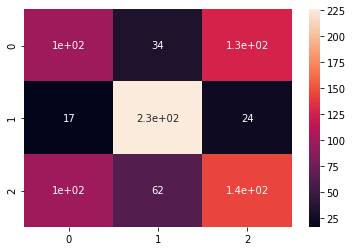

In [49]:
# Evaluation of model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print('Accuracy:',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

In [50]:
## Model Training on (soft voting)
model=VotingClassifier(estimators=base_models,voting='soft')
model.fit(sc_xtrain,ytrain)

F:\Installed\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('RFC', RandomForestClassifier(n_estimators=50)),
                             ('ABC', AdaBoostClassifier()),
                             ('GBC',
                              GradientBoostingClassifier(n_estimators=50)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                          

In [51]:
## Model Testing
ypred=model.predict(sc_xtest)

Accuracy: 0.5765550239234449
              precision    recall  f1-score   support

           1       0.48      0.37      0.42       262
           2       0.73      0.80      0.76       267
           3       0.50      0.56      0.53       307

    accuracy                           0.58       836
   macro avg       0.57      0.58      0.57       836
weighted avg       0.57      0.58      0.57       836



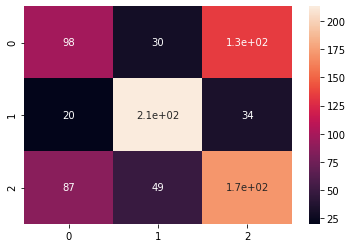

In [52]:
# Evaluation of model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print('Accuracy:',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

## Final Evaluation Result

In [55]:
model=['hard','soft','std_hard','std_soft','out_clip_hard','out_clip_soft','out_clip_std_hard','out_clip_std_soft']
acc=[0.5873,0.5706,0.5634,0.5526,0.5753,0.5849,0.5634,0.5765]
dict={'Voting_Classifier_models':model,'Accuracy':acc}
result=pd.DataFrame(dict)
result

,Voting_Classifier_models,Accuracy
0,hard,0.5873
1,soft,0.5706
2,std_hard,0.5634
3,std_soft,0.5526
4,out_clip_hard,0.5753
5,out_clip_soft,0.5849
6,out_clip_std_hard,0.5634
7,out_clip_std_soft,0.5765


where
    
    std          = standard scaler data
    out_clip     = Outliers clipped data
    out_clip_std = Outliers clipped Standard Scaler data

<AxesSubplot:xlabel='Voting_Classifier_models', ylabel='Accuracy'>

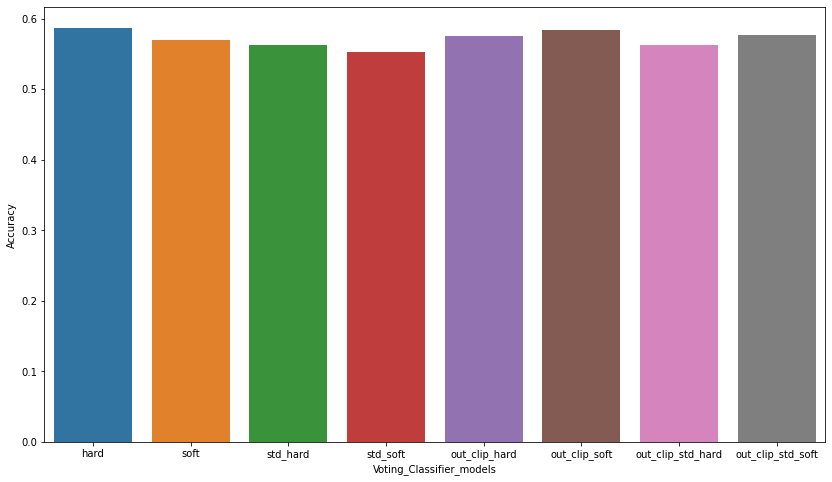

In [58]:
plt.figure(figsize=(14,8))
sns.barplot(x='Voting_Classifier_models',y='Accuracy',data=result)

### Conclusion

Overall it gives poor accuracy on all the models but when it comes to comparing of this model it gives little good result on hard model and out_clip_soft model.